# EDA and FileHandling

In [66]:
from os import mkdir, path
from shutil import copy
from sys import platform
import glob
import matplotlib.pyplot as plt
from random import shuffle, seed, sample

## b)

In [32]:
current_directory = path.abspath("")
if platform == "darwin":
    images = [
        (plt.imread(file_path), file_path.split("/")[-1].split(".")[0], file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]
if platform == "win32":
    images = [
        (plt.imread(file_path), file_path.split("/")[-1][6:].split(".")[0], file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]

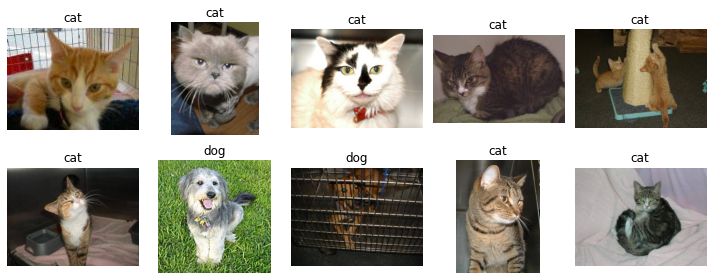

In [77]:
def plot_sample_images(image_list:list):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for index, ax in enumerate(axes.flatten()):
        ax.imshow(image_list[index][0], cmap = "gray")
        ax.set_title(image_list[index][1])
        ax.axis("off")
    fig.tight_layout()

seed(418)
plot_sample_images(sample(images, 10))

## c)

In [60]:
folder_name_structure = ('experiment_small_dataset', 'experiment_tiny_dataset')
sub_folder_structure = ('test', 'train', 'val')

try:
    mkdir(f'{current_directory}/original_dataset')
    for folder_name in folder_name_structure:
        root_folder_name = f'{current_directory}/{folder_name}'
        mkdir(root_folder_name)
        for sub_folder_name in sub_folder_structure:
            mkdir(f'{root_folder_name}/{sub_folder_name}')
except:
    pass

## d)

In [74]:
def shuffle_list(list_x:list):
    shuffle(list_x)
    return list_x

seed(418)
cat_images = shuffle_list([image[2] for image in images if image[1] == 'cat'])
dog_images = shuffle_list([image[2] for image in images if image[1] == 'dog'])

cat_images[0], dog_images[0]

('c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\cat.6411.jpg',
 'c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\dog.9695.jpg')

In [84]:
def move_image_files_from_list(image_list:list):
    train_file_names = image_list[:800]
    val_file_names = image_list[800:1000]
    test_file_names = image_list[1000:1500]
    def copy_files(file_names, target_folder):
        for file_name in file_names:
            copy(file_name, target_folder)

    copy_files(train_file_names, f'{current_directory}/experiment_small_dataset/train')
    copy_files(val_file_names, f'{current_directory}/experiment_small_dataset/val')
    copy_files(test_file_names, f'{current_directory}/experiment_small_dataset/test')


move_image_files_from_list(cat_images)
move_image_files_from_list(dog_images)